<a href="https://colab.research.google.com/github/LindseyShantanu/AI-ML-Dev/blob/main/KMeansClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

#Data

country (text): name of the country

child_mort (float): Deaths of children under 5 years of age per 1000 live births

exports (float): Exports of goods and services per capita. Given as % of the GDP per capita

health (float): Total health spending per capita. Given as %age of GDP per capita

imports (float): Imports of goods and services per capita. Given as %age of the GDP per capita

income (float): Net income per person

inflation (float): The measurement of the annual growth rate of the Total GDP

life_expec (float): Average life expectancy of citizens in the country

total_fer (float): Average number of children born in each family

gdpp (float): The GDP per capita. Calculated as the Total GDP divided by the total population.

In [2]:
url = "https://drive.google.com/uc?export=download&id=1wAMxE_xWS01MM5nbjEmgRRH6hXea3ft_"
data = pd.read_csv(url)
country = pd.DataFrame(data['country']) #data cleaning
stats = data.loc[:, 'child_mort':'gdpp']
stats.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


#Normalization

In [3]:
for column in stats.columns:
    stats[column] = MinMaxScaler().fit_transform(np.array(stats[column]).reshape(-1,1))

stats.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242


#Preliminary Visualization

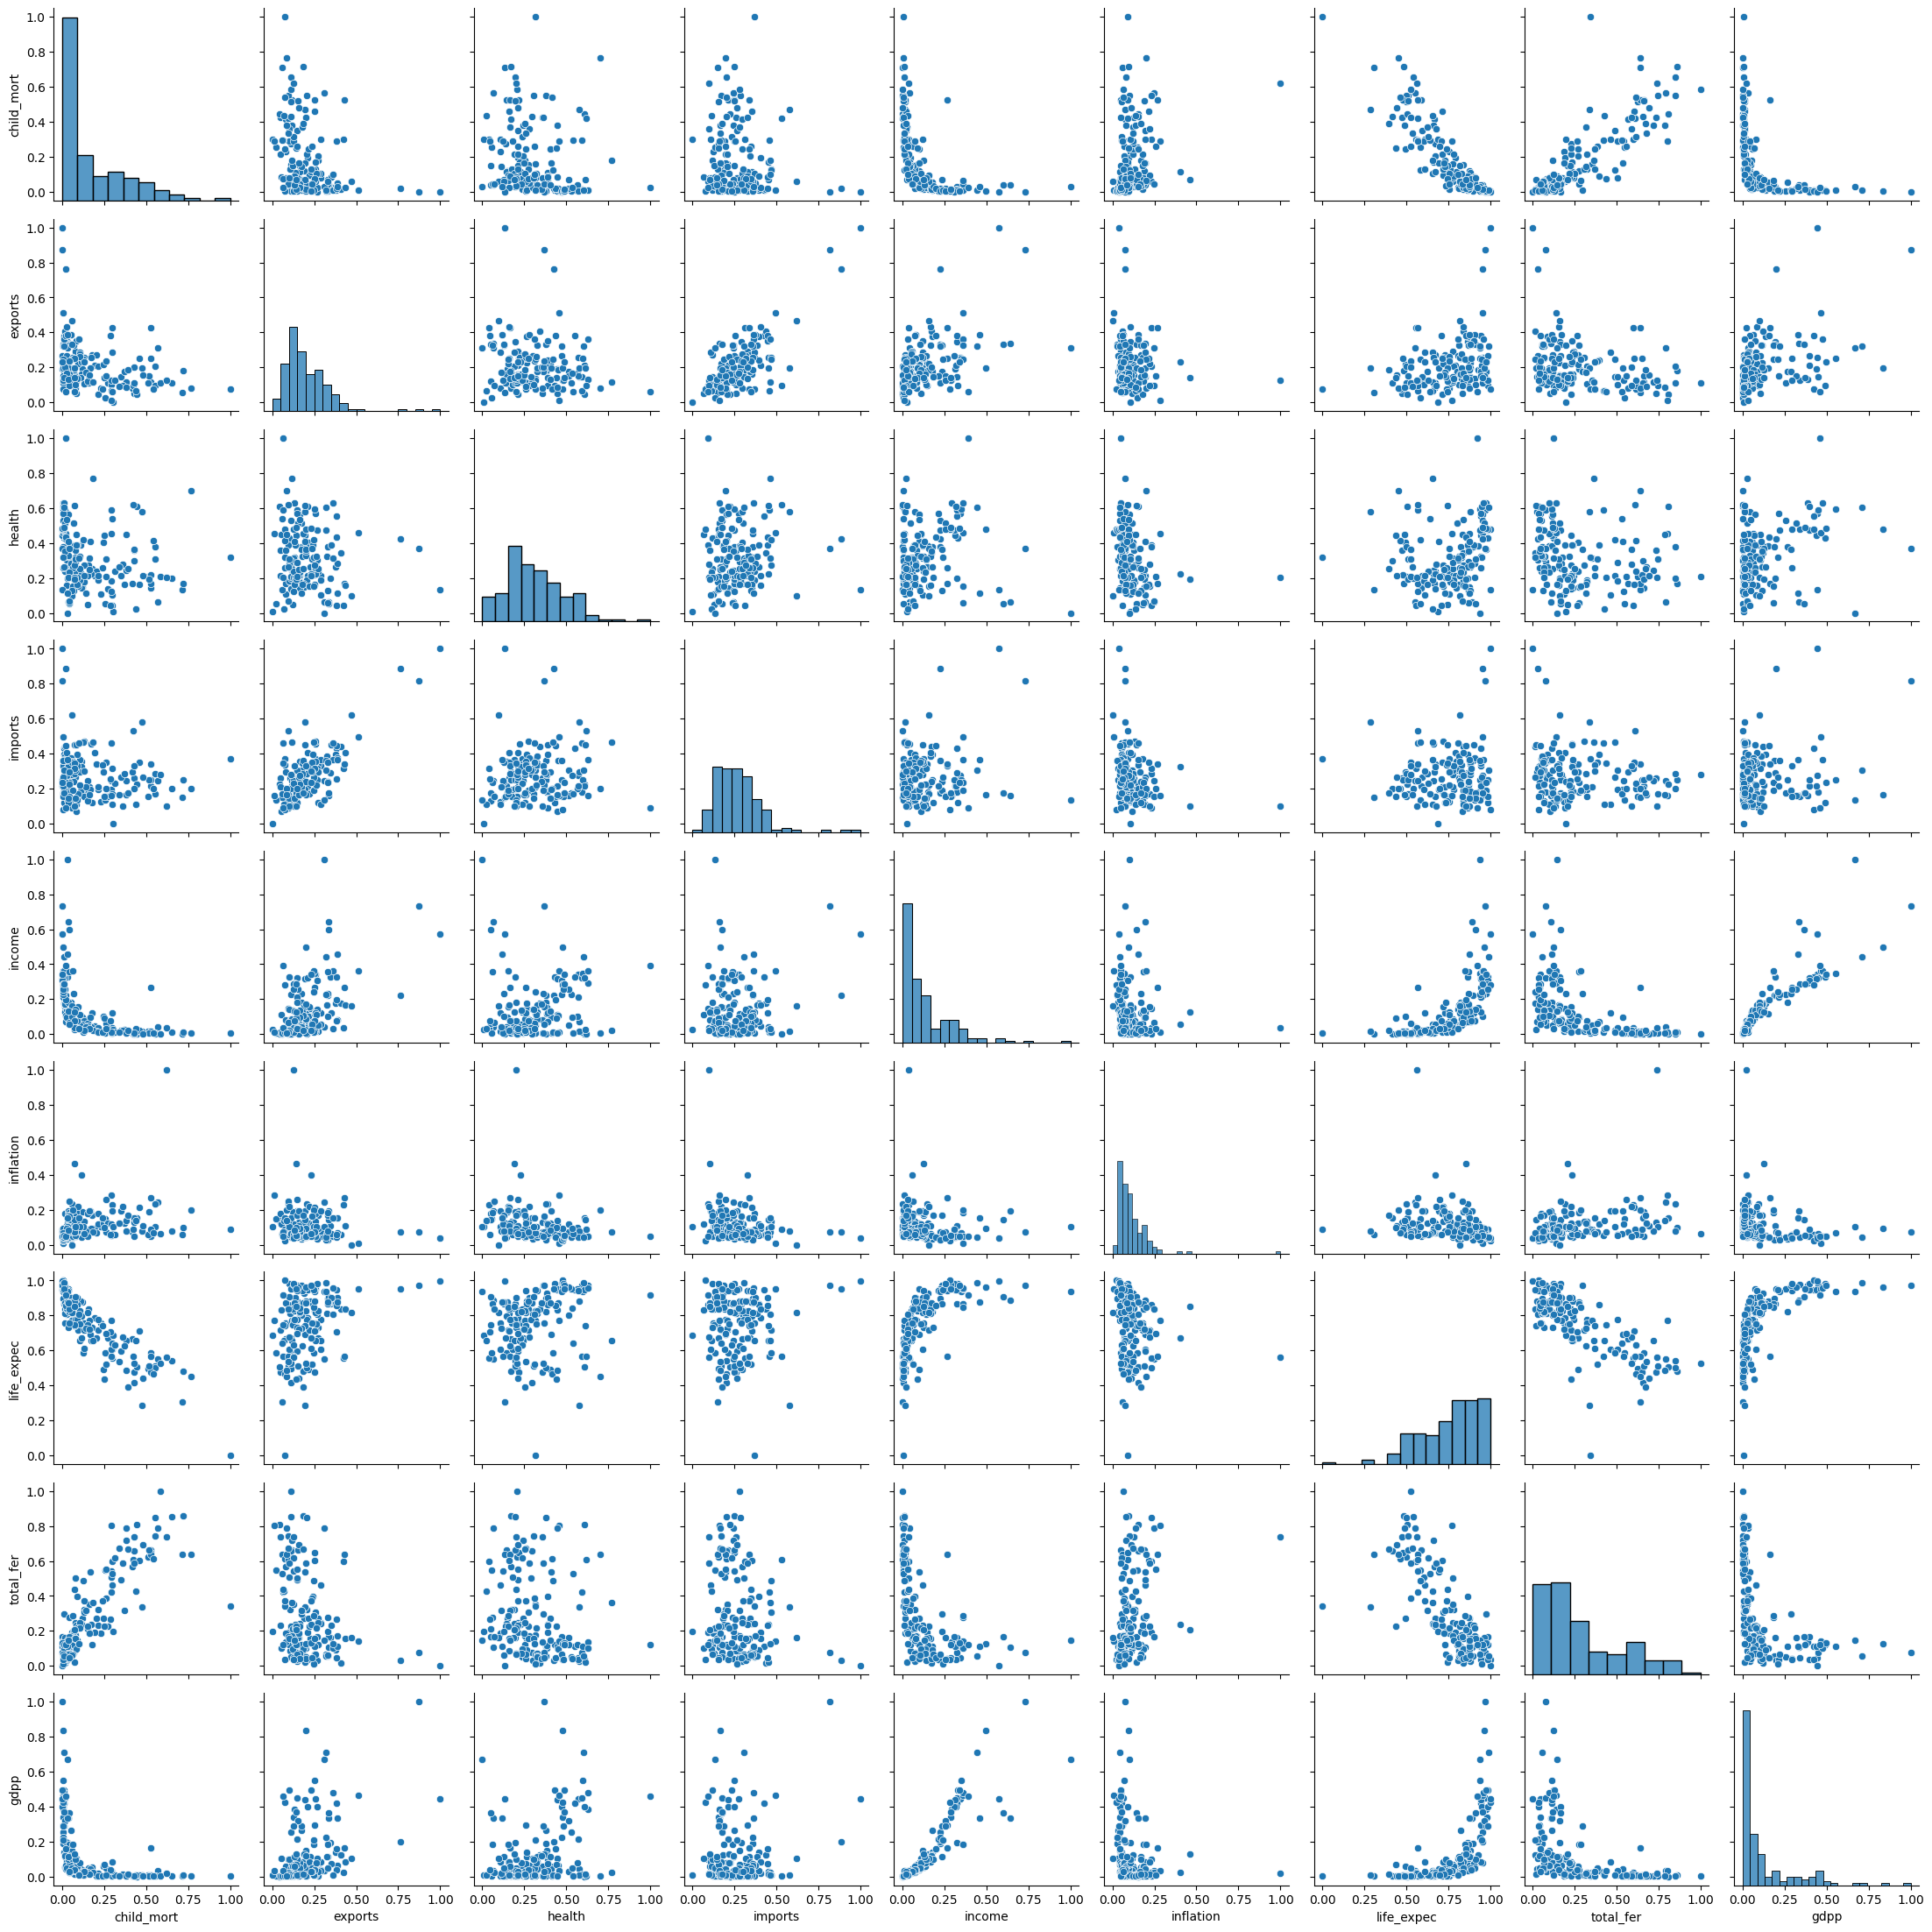

In [4]:
p = sns.PairGrid(stats)
p.map_diag(sns.histplot)
p.map_offdiag(sns.scatterplot)

#Model

In [5]:
kmeans = KMeans(n_clusters=3).fit(stats)
predict = kmeans.predict(stats)
stats['class'] = predict
stats.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,class
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073,1
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833,2
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365,2
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488,1
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242,2


#Visualization

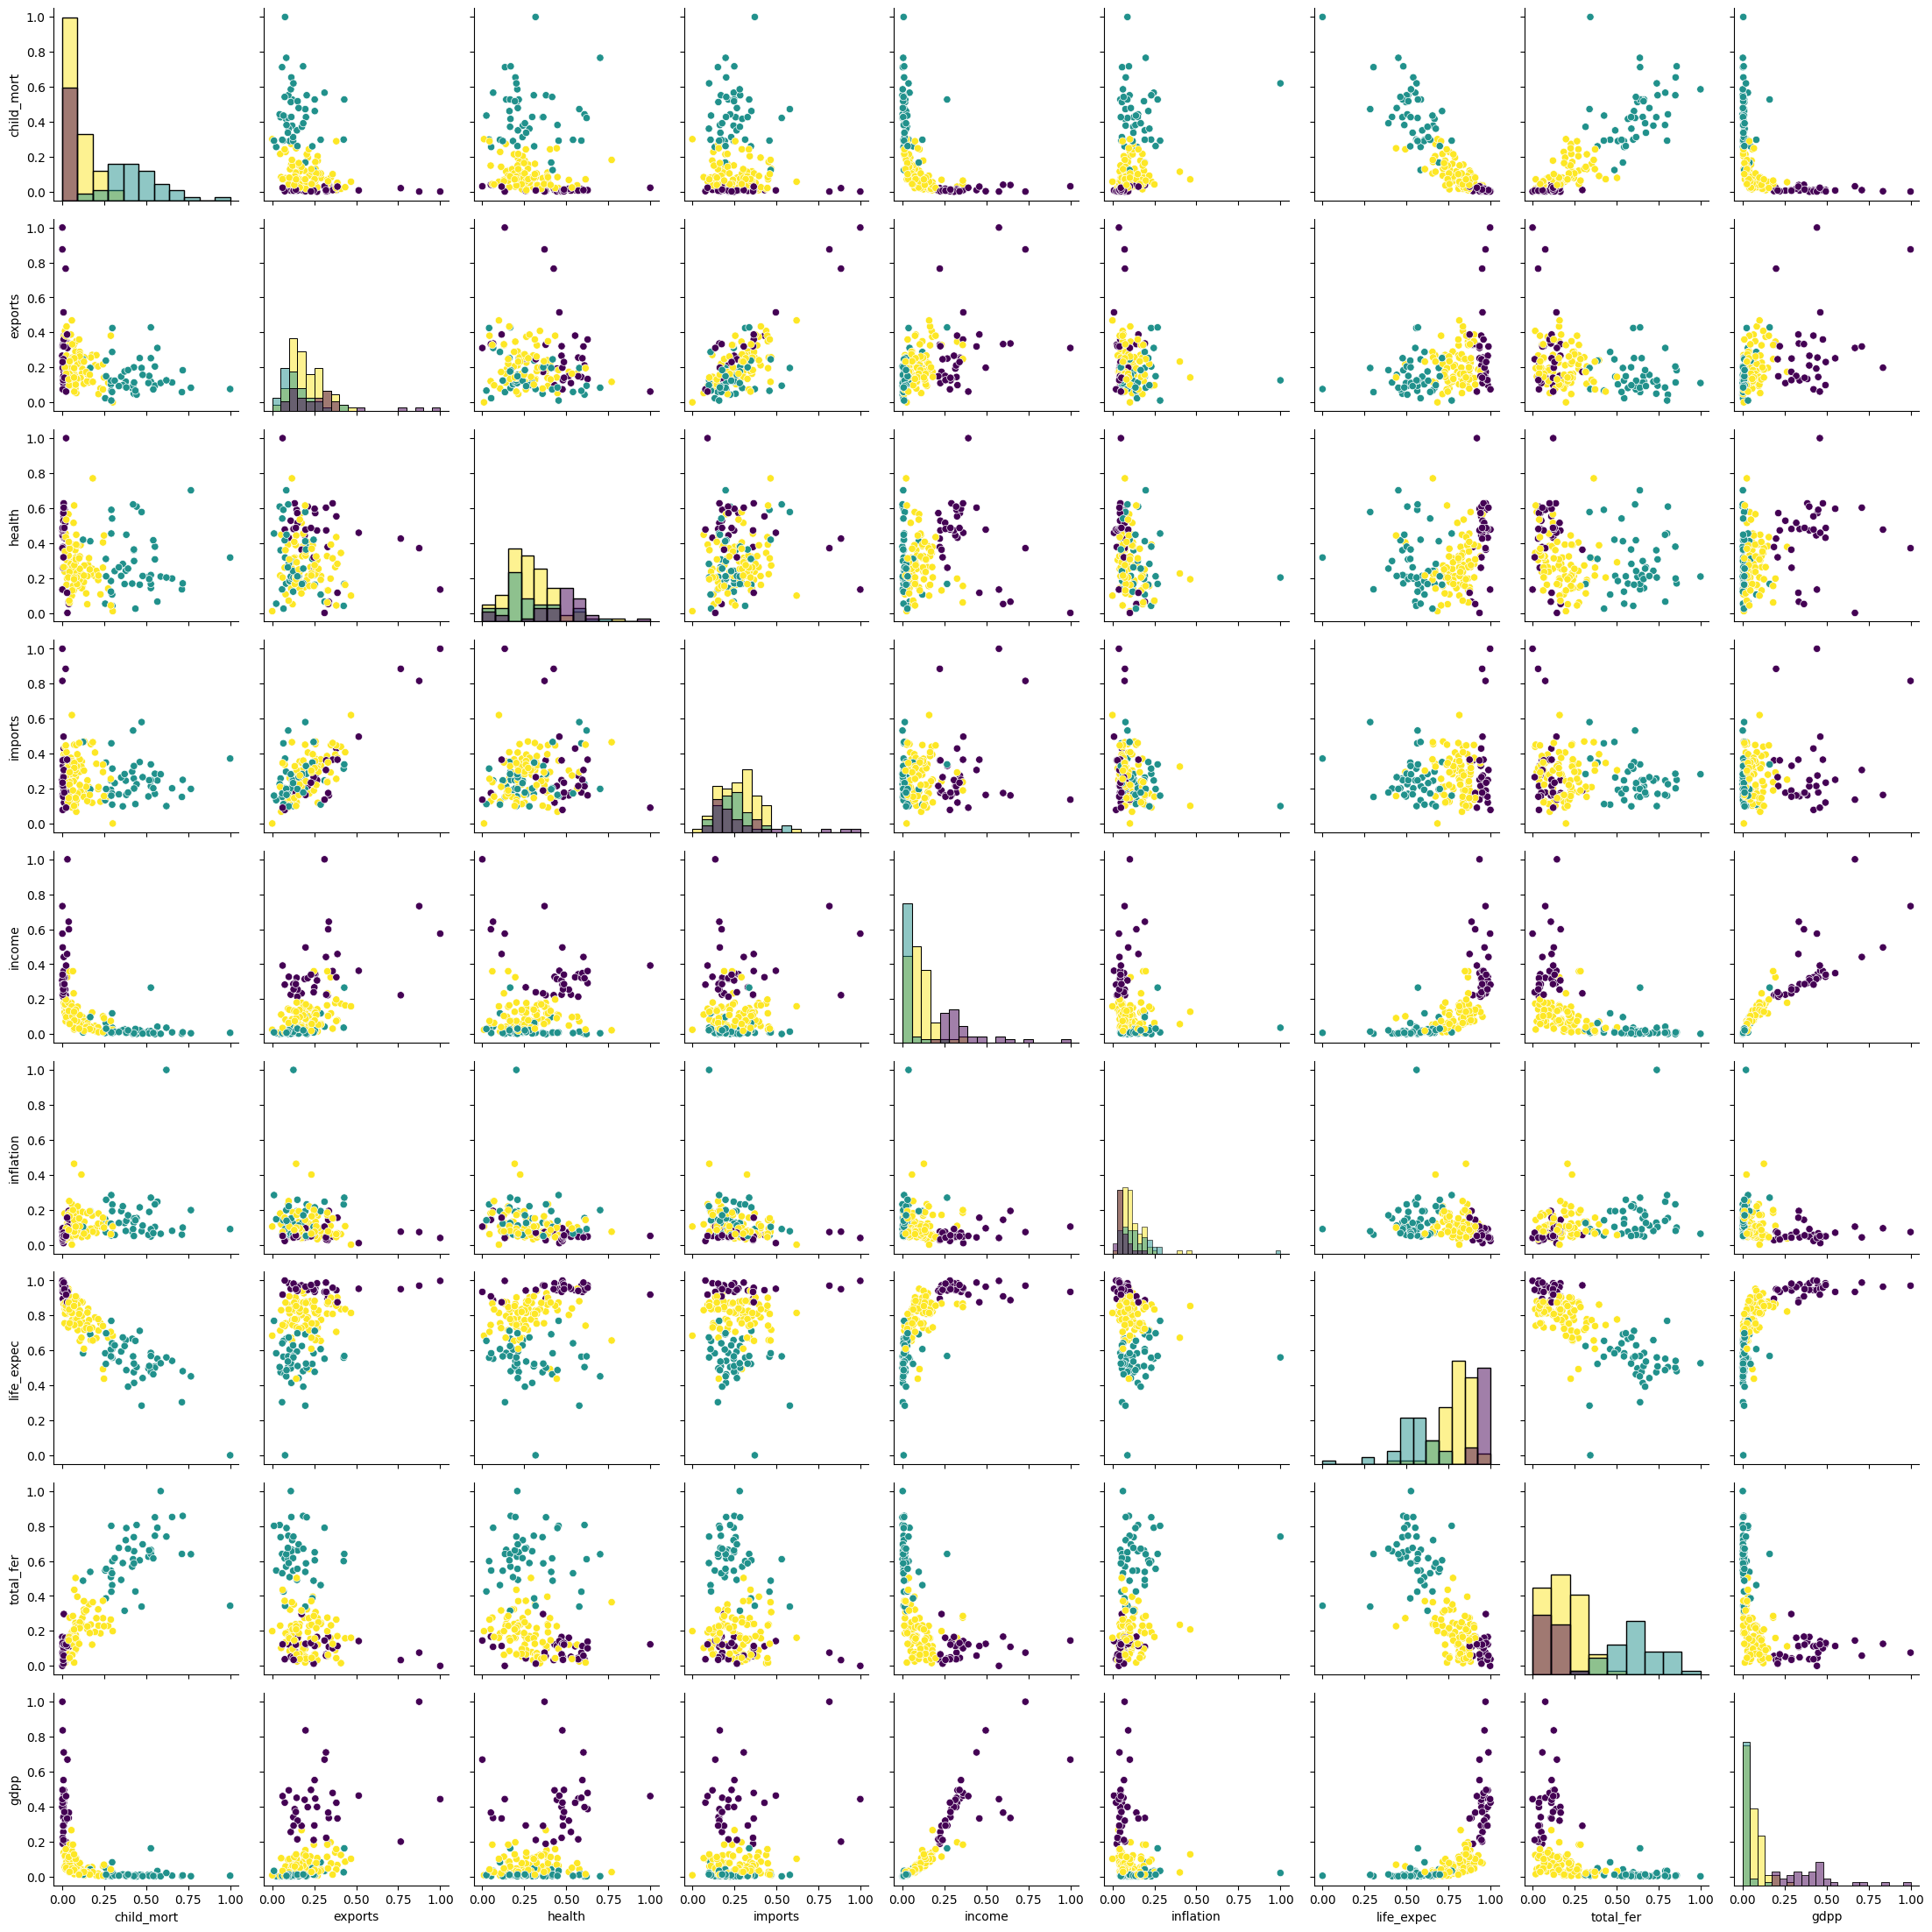

In [6]:
p = sns.PairGrid(stats, hue='class', palette='viridis')
p.map_diag(sns.histplot)
p.map_offdiag(sns.scatterplot)

In [9]:
data['class'] = predict
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(data.sort_values(by="class"))

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,class
110,Netherlands,4.5,72.000,11.90,63.6000,45500,0.848,80.7,1.79,50300,0
91,Luxembourg,2.8,175.000,7.77,142.0000,91700,3.620,81.3,1.63,105000,0
74,Israel,4.6,35.000,7.63,32.9000,29600,1.770,81.4,3.03,30600,0
123,Qatar,9.0,62.300,1.81,23.8000,125000,6.980,79.5,2.07,70300,0
23,Brunei,10.5,67.400,2.84,28.0000,80600,16.700,77.1,1.84,35300,0
122,Portugal,3.9,29.900,11.00,37.4000,27200,0.643,79.8,1.39,22500,0
75,Italy,4.0,25.200,9.53,27.2000,36200,0.319,81.7,1.46,35800,0
114,Norway,3.2,39.700,9.48,28.5000,62300,5.950,81.0,1.95,87800,0
77,Japan,3.2,15.000,9.49,13.6000,35800,-1.900,82.8,1.39,44500,0
29,Canada,5.6,29.100,11.30,31.0000,40700,2.870,81.3,1.63,47400,0
